# California Housing Price Prediction

The purpose of the project is to predict median house values in Californian districts, given many features from these districts.

## Importing Libraries

In [4]:
#import the necessary libraries required 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics


%matplotlib inline
print(os.listdir("."))

# Read the dataset
file_path = "./housing.csv"
if os.path.exists(file_path):
    housing_data = pd.read_csv(file_path)
    print(housing_data.head())  # Display the first few rows of the dataframe
else:
    print(f"{file_path} does not exist.")

['.git', 'california-housing-price-prediction.ipynb', 'housing.csv', 'README.md']
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR

## Basic Data Analysis or Exploratory Data Analysis

In [ ]:
print("The number of rows and colums are {} and also called shape of the matrix".format(housing.shape))
print("Columns names are \n {}".format(housing.columns))


The number of rows and colums are (20640, 10) and also called shape of the matrix
Columns names are 
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [ ]:
print(housing.head())


   longitude  latitude       ...         median_house_value  ocean_proximity
0    -122.23     37.88       ...                   452600.0         NEAR BAY
1    -122.22     37.86       ...                   358500.0         NEAR BAY
2    -122.24     37.85       ...                   352100.0         NEAR BAY
3    -122.25     37.85       ...                   341300.0         NEAR BAY
4    -122.25     37.85       ...                   342200.0         NEAR BAY

[5 rows x 10 columns]


In [ ]:
print(housing.tail())

       longitude  latitude       ...         median_house_value  ocean_proximity
20635    -121.09     39.48       ...                    78100.0           INLAND
20636    -121.21     39.49       ...                    77100.0           INLAND
20637    -121.22     39.43       ...                    92300.0           INLAND
20638    -121.32     39.43       ...                    84700.0           INLAND
20639    -121.24     39.37       ...                    89400.0           INLAND

[5 rows x 10 columns]


In [ ]:
print(housing.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


#### The median house values are continuous and hence it is a regression problem
#### One of the column is a categorical feature (ocean_proximity)

In [ ]:

housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:

print ("Total_bedrooms column Mode is  "+str(housing["total_bedrooms"].mode())+"\n")
print(housing["total_bedrooms"].describe())

Total_bedrooms column Mode is  0    280.0
dtype: float64

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64


In [ ]:
housing.duplicated().sum()

0

<Figure size 432x288 with 0 Axes>

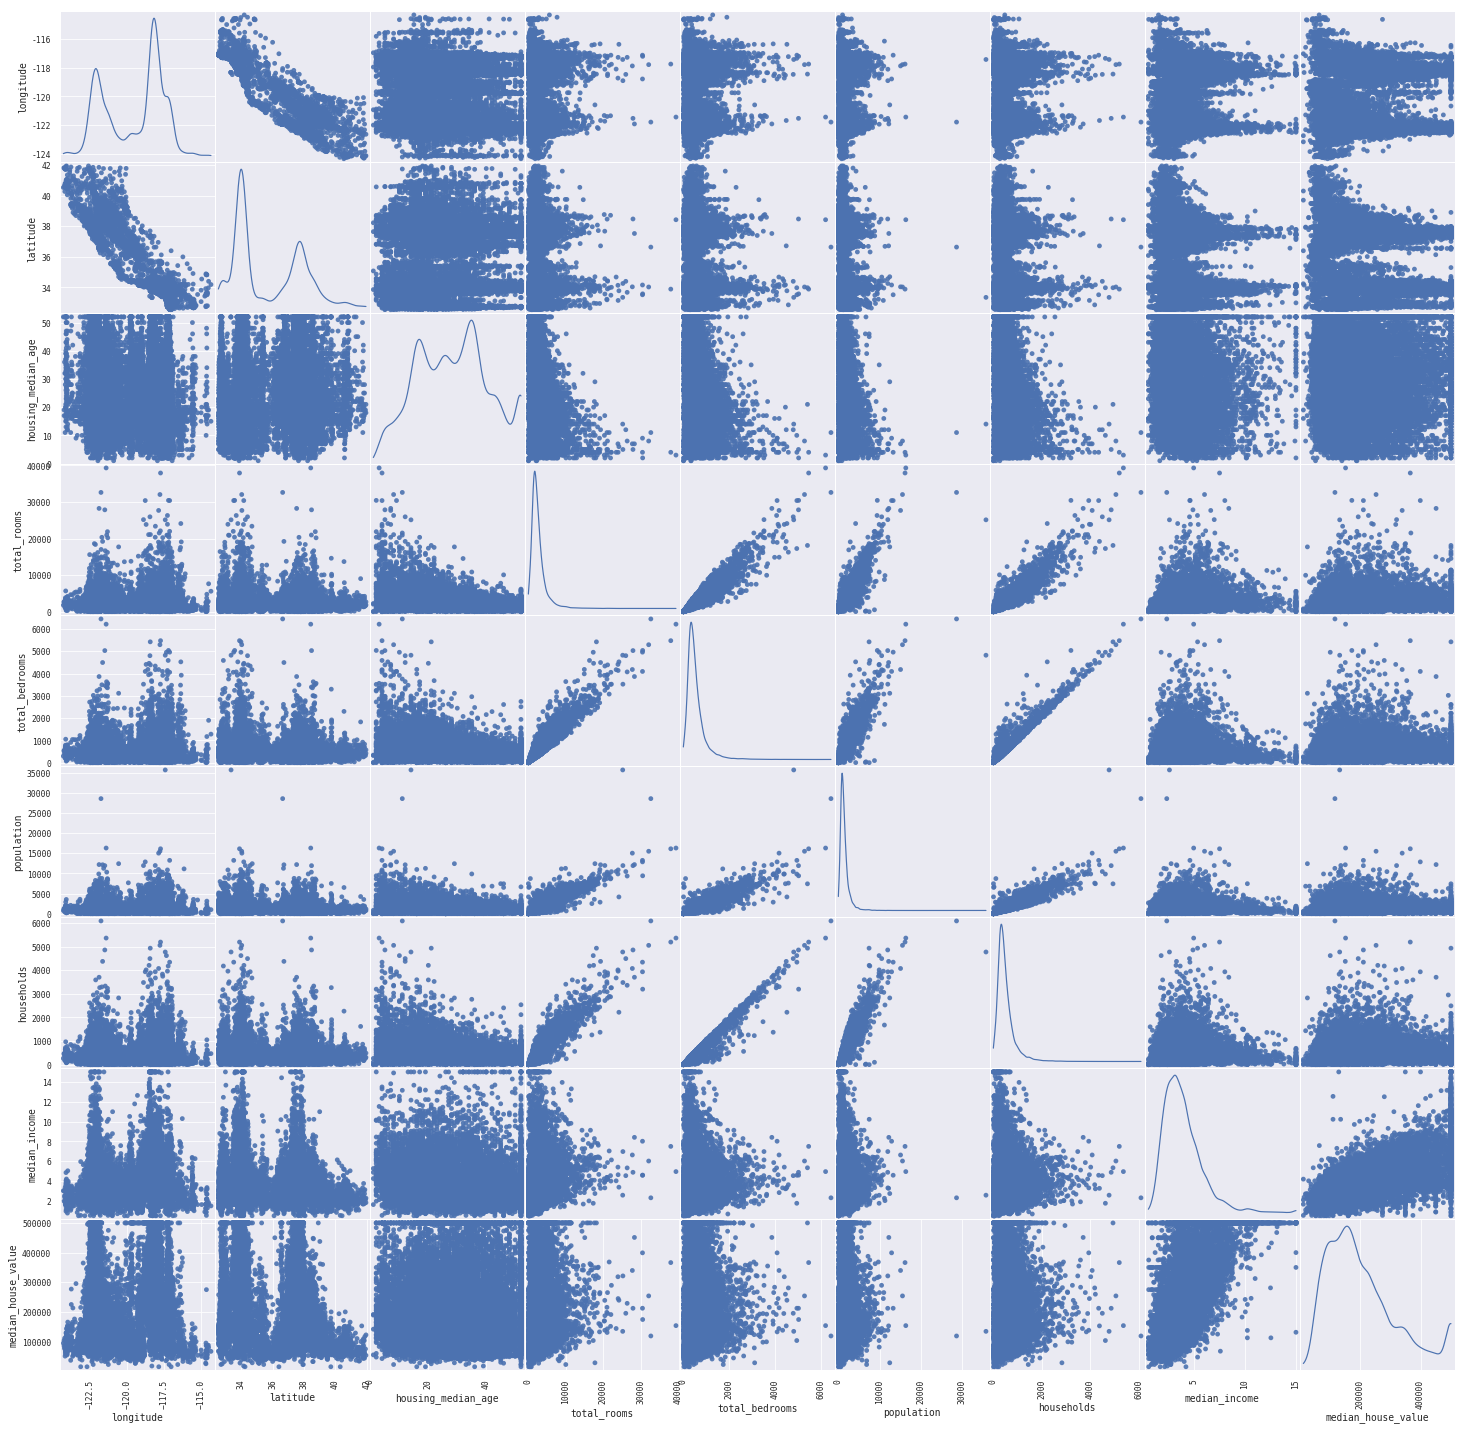

In [ ]:

fig = plt.figure()
scatter_matrix(housing,figsize =(25,25),alpha=0.9,diagonal="kde",marker="o");


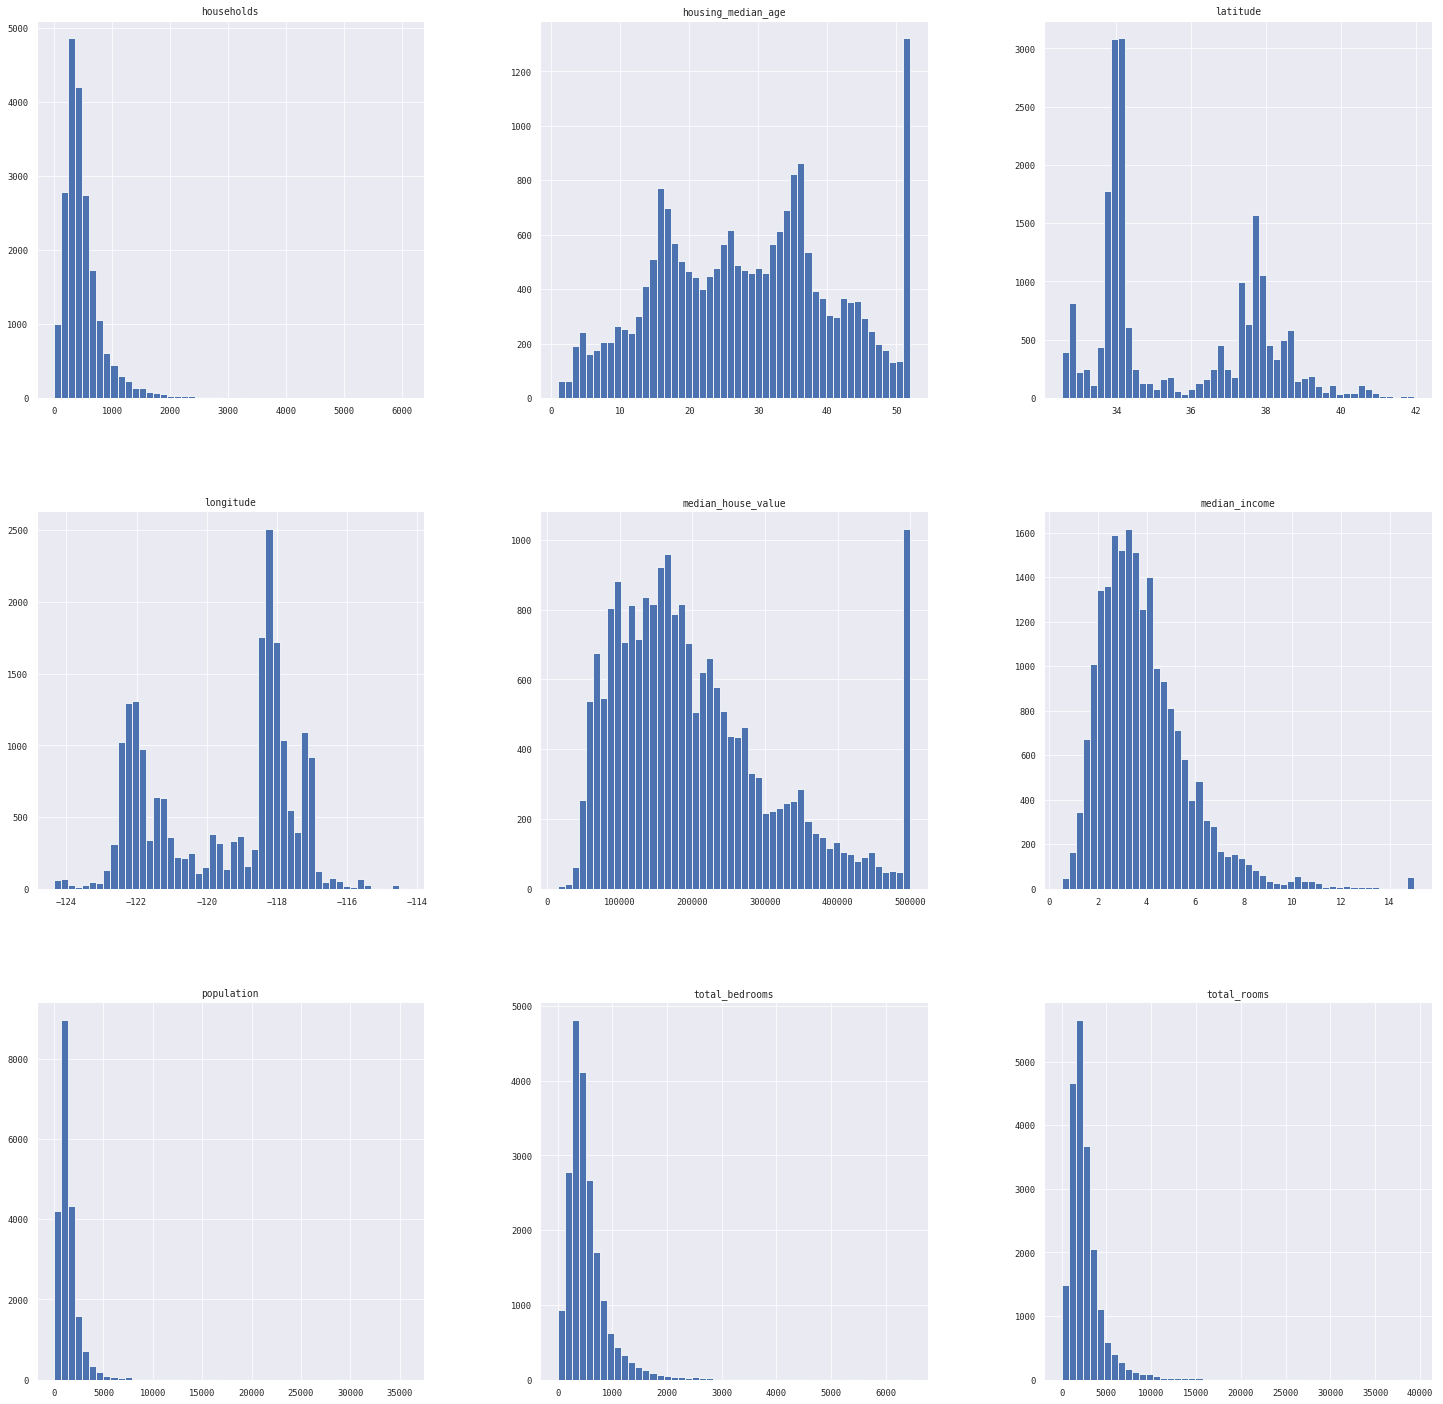

In [ ]:
housing.hist(figsize=(25,25),bins=50);

In [ ]:
hcorr = housing.corr()
hcorr.style.background_gradient()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1,-0.924664,-0.108197,0.044568,0.069608,0.0997732,0.0553101,-0.0151759,-0.0459666
latitude,-0.924664,1,0.0111727,-0.0360996,-0.0669828,-0.108785,-0.0710354,-0.0798091,-0.14416
housing_median_age,-0.108197,0.0111727,1,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.0360996,-0.361262,1,0.93038,0.857126,0.918484,0.19805,0.134153
total_bedrooms,0.069608,-0.0669828,-0.320451,0.93038,1,0.877747,0.979728,-0.00772285,0.0496862
population,0.0997732,-0.108785,-0.296244,0.857126,0.877747,1,0.907222,0.00483435,-0.0246497
households,0.0553101,-0.0710354,-0.302916,0.918484,0.979728,0.907222,1,0.0130331,0.0658427
median_income,-0.0151759,-0.0798091,-0.119034,0.19805,-0.00772285,0.00483435,0.0130331,1,0.688075
median_house_value,-0.0459666,-0.14416,0.105623,0.134153,0.0496862,-0.0246497,0.0658427,0.688075,1


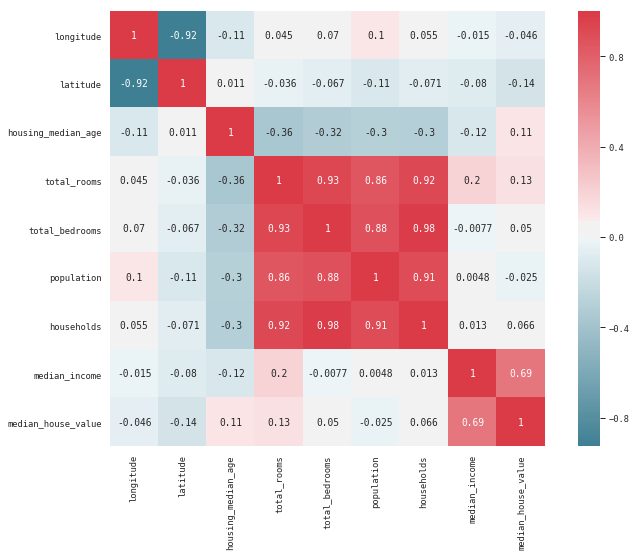

In [ ]:
 
sns.set(context="paper",font="monospace")
housing_corr_matrix = housing.corr()

fig, axe = plt.subplots(figsize=(12,8))

cmap = sns.diverging_palette(220,10,center = "light", as_cmap=True)

sns.heatmap(housing_corr_matrix,vmax=1,square =True, cmap=cmap,annot=True );

### Get the Outliers

In [ ]:
def getOutliers(dataframe,column):
    column = "total_rooms" 
    
    des = dataframe[column].describe()
    desPairs = {"count":0,"mean":1,"std":2,"min":3,"25":4,"50":5,"75":6,"max":7}
    Q1 = des[desPairs['25']]
    Q3 = des[desPairs['75']]
    IQR = Q3-Q1
    lowerBound = Q1-1.5*IQR
    upperBound = Q3+1.5*IQR
    print("(IQR = {})Outlier are anything outside this range: ({},{})".format(IQR,lowerBound,upperBound))
  
    data = dataframe[(dataframe [column] < lowerBound) | (dataframe [column] > upperBound)]

    print("Outliers out of total = {} are \n {}".format(housing[column].size,len(data[column])))
   
    outlierRemoved = housing[~housing[column].isin(data[column])]
    return outlierRemoved

In [ ]:

df_outliersRemoved = getOutliers(housing,"total_rooms")

(IQR = 1700.25)Outlier are anything outside this range: (-1102.625,5698.375)
Outliers out of total = 20640 are 
 1287


In [ ]:
housing_ind = housing.drop("median_house_value",axis=1)
print(housing_ind.head())
housing_dep = housing["median_house_value"]
print("Medain Housing Values")
print(housing_dep.head())

   longitude  latitude       ...         median_income  ocean_proximity
0    -122.23     37.88       ...                8.3252                3
1    -122.22     37.86       ...                8.3014                3
2    -122.24     37.85       ...                7.2574                3
3    -122.25     37.85       ...                5.6431                3
4    -122.25     37.85       ...                3.8462                3

[5 rows x 9 columns]
Medain Housing Values
0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64


In [ ]:

X_train,X_test,y_train,y_test = train_test_split(housing_ind,housing_dep,test_size=0.2,random_state=42)

print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))


X_train shape (16512, 9) and size 148608
X_test shape (4128, 9) and size 37152
y_train shape (16512,) and size 16512
y_test shape (4128,) and size 4128


In [ ]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,4
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,4
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,4
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,4
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,1


## Standardize the data 

In [ ]:

independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform(X_train)
X_test = independent_scaler.transform(X_test)
print(X_train[0:5,:])
print("test data")
print(X_test[0:5,:])

[[ 1.27258656 -1.3728112   0.34849025  0.22256942  0.21122752  0.76827628
   0.32290591 -0.326196    2.00593172]
 [ 0.70916212 -0.87669601  1.61811813  0.34029326  0.59309419 -0.09890135
   0.6720272  -0.03584338  2.00593172]
 [-0.44760309 -0.46014647 -1.95271028 -0.34259695 -0.49522582 -0.44981806
  -0.43046109  0.14470145  2.00593172]
 [ 1.23269811 -1.38217186  0.58654547 -0.56148971 -0.40930582 -0.00743434
  -0.38058662 -1.01786438  2.00593172]
 [-0.10855122  0.5320839   1.14200767 -0.11956547 -0.25655915 -0.48587717
  -0.31496232 -0.17148831 -0.1124266 ]]
test data
[[ 0.28534728  0.1951     -0.28632369 -0.52286157 -0.24701249 -0.03030109
  -0.37008673 -1.15508475 -0.1124266 ]
 [ 0.06097472 -0.23549054  0.11043502  0.13841528 -0.24701249  0.12185077
   0.220532   -0.70865905 -0.1124266 ]
 [-1.42487026  1.00947776  1.85617335  0.54630997 -0.24701249 -0.10241931
   1.21539643 -0.21040155  1.29981228]
 [ 0.42994293 -0.63799909 -0.92113763  0.18808002 -0.24701249  0.24497944
  -0.013090

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [ ]:

linearRegModel = LinearRegression(n_jobs=-1)

linearRegModel.fit(X_train,y_train)
 
print("Intercept is "+str(linearRegModel.intercept_))
print("coefficients  is "+str(linearRegModel.coef_))

Intercept is 207194.69373788778
coefficients  is [-85854.94724101 -90946.06271148  14924.30655143 -17693.23405277
  48767.60670995 -43884.16852449  17601.31495096  77144.10164179
   -451.52015229]


In [ ]:

y_pred = linearRegModel.predict(X_test)

In [ ]:
print(len(y_pred))
print(len(y_test))
print(y_pred[0:5])
print(y_test[0:5])


4128
4128
[ 63642.8756283  154445.82484211 252777.76132135 263796.8643552
 266307.35634572]
20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
Name: median_house_value, dtype: float64


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


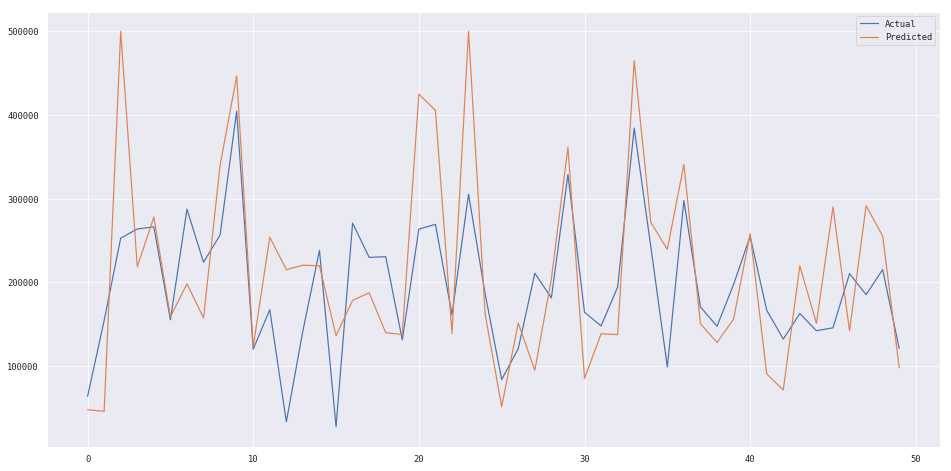

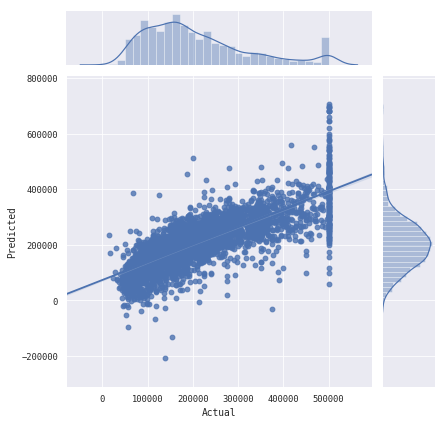

In [ ]:
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

####   Root Mean Squared Error (RMSE)

In [ ]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print(np.sqrt(metrics.mean_squared_error(y_train,linearRegModel.predict(X_train))))


71147.87146118375
69361.0714290645


## Perform Decision Tree Regression
Performing Decision Tree Regression on training data.
Predicting output for test dataset using the fitted model.

Printing root mean squared error from Decision Tree Regression.

In [ ]:
dtReg = DecisionTreeRegressor(max_depth=9)
dtReg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [ ]:
dtReg_y_pred = dtReg.predict(X_test)
dtReg_y_pred

array([ 60503.2556391 ,  75919.52054795, 478283.56097561, ...,
       488611.25      ,  75919.52054795, 211563.96963563])

In [ ]:
print(len(dtReg_y_pred))
print(len(y_test))
print(dtReg_y_pred[0:5])
print(y_test[0:5])

4128
4128
[ 60503.2556391   75919.52054795 478283.56097561 293759.82867133
 263196.4739726 ]
20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
Name: median_house_value, dtype: float64


In [ ]:
print(np.sqrt(metrics.mean_squared_error(y_test,dtReg_y_pred)))

60886.88194263856


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


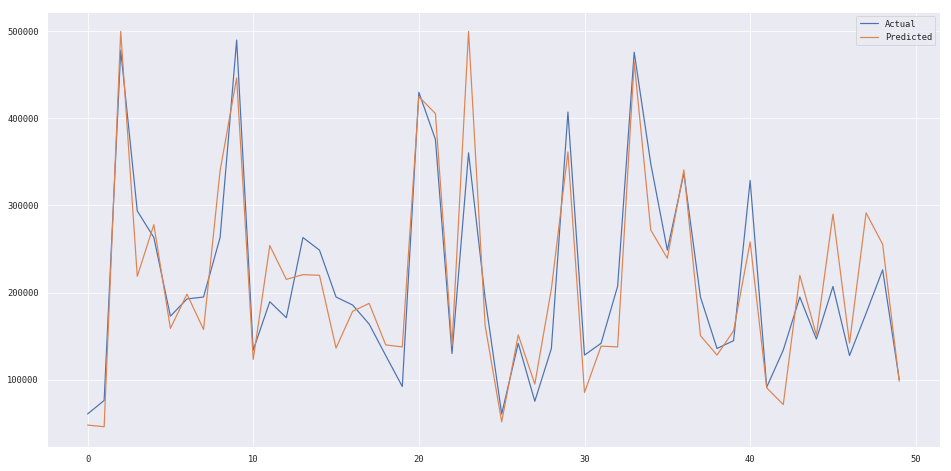

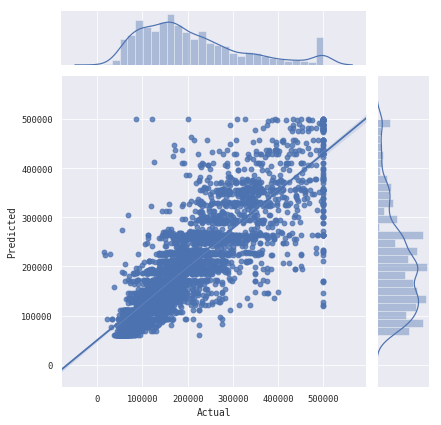

In [ ]:
test = pd.DataFrame({'Predicted':dtReg_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")

## Performing Random Forest Regression


In [ ]:
rfReg = RandomForestRegressor(30)
rfReg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [ ]:
rfReg_y_pred = rfReg.predict(X_test)
print(len(rfReg_y_pred))
print(len(y_test))
print(rfReg_y_pred[0:5])
print(y_test[0:5])

4128
4128
[ 52300.          64423.33333333 469353.76666667 254570.
 274743.43333333]
20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
Name: median_house_value, dtype: float64


In [ ]:
print(np.sqrt(metrics.mean_squared_error(y_test,rfReg_y_pred)))

50392.61236374458


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


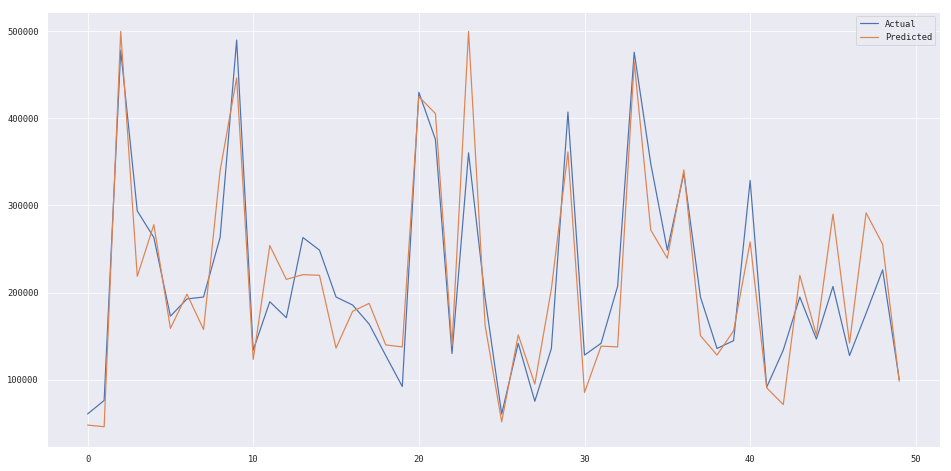

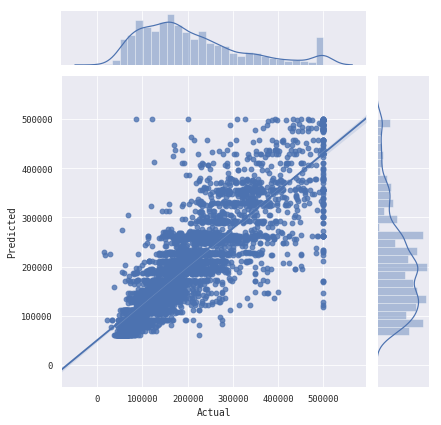

In [ ]:
test = pd.DataFrame({'Predicted':dtReg_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")

##  Performing Linear Regression with one independent Variable




In [ ]:
#Extract median_income 
dropcol = ["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","ocean_proximity"]
print(dropcol)
housing_med = housing_ind.drop(dropcol,axis=1)
print(type(housing_med))

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'ocean_proximity']
<class 'pandas.core.frame.DataFrame'>


In [ ]:

X_train2,X_test2,y_train2,y_test2 = train_test_split(housing_med,housing_dep,test_size=0.2,random_state=42)

print("X_train2 shape {} and size {}".format(X_train2.shape,X_train2.size))
print("X_test2 shape {} and size {}".format(X_test2.shape,X_test2.size))
print("y_train2 shape {} and size {}".format(y_train2.shape,y_train2.size))
print("y_test2 shape {} and size {}".format(y_test2.shape,y_test2.size))

X_train2 shape (16512, 1) and size 16512
X_test2 shape (4128, 1) and size 4128
y_train2 shape (16512,) and size 16512
y_test2 shape (4128,) and size 4128


In [ ]:
linReg2 = LinearRegression()
linReg2.fit(X_train2,y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
y_pred2 = linReg2.predict(X_test2)
print(len(y_pred2))
print(len(y_test2))
print(y_pred2[0:5])
print(y_test2[0:5])

4128
4128
[114958.91676996 150606.88213964 190393.71844449 285059.38345102
 200663.31816103]
20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
Name: median_house_value, dtype: float64


Text(0,0.5,' Predicted median_house_value')

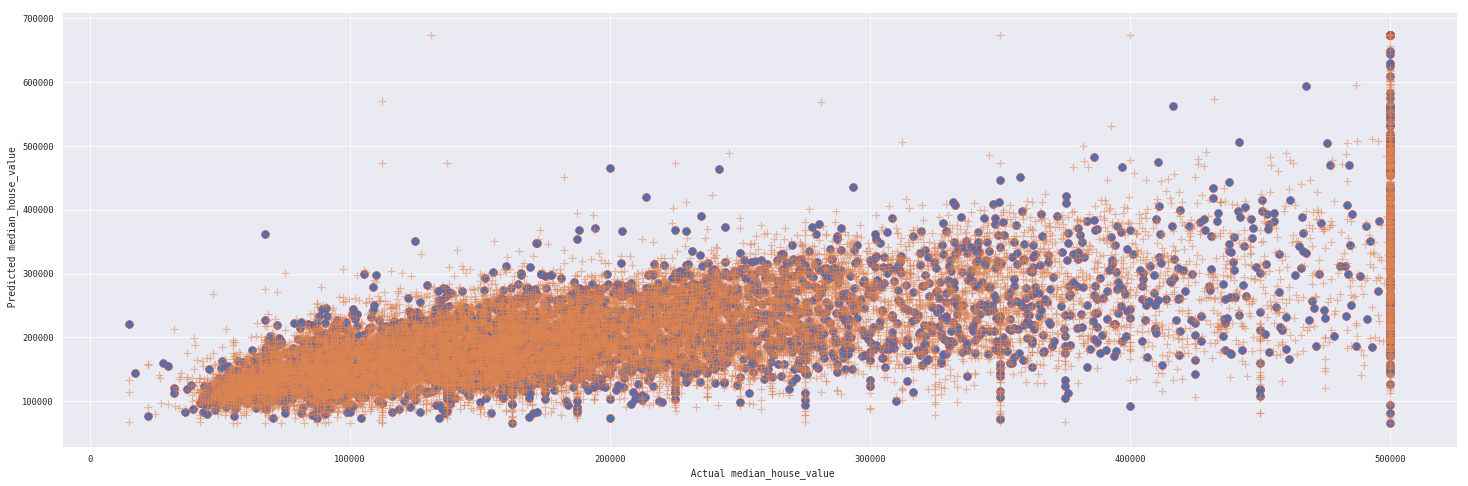

In [ ]:
fig = plt.figure(figsize=(25,8))
plt.scatter(y_test2,y_pred2,marker="o",edgecolors ="r",s=60)
plt.scatter(y_train2,linReg2.predict(X_train2),marker="+",s=50,alpha=0.5)
plt.xlabel(" Actual median_house_value")
plt.ylabel(" Predicted median_house_value")

# Summary

Observations : The median_income , totat_bedrooms have highly skewed data.The data is highly unbalance. 
 